# **Lorentzian TB**

In [17]:
import pandas as pd
import numpy as np
from tradeAlpaca import tradeAlpaca
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import pickle
import matplotlib.pyplot as plt
from advanced_ta import LorentzianClassification
from ta.volume import money_flow_index as MFI

In [2]:
trade_inst = tradeAlpaca(keys_file="../../data/alpaca_keys.cfg")

In [3]:
data = trade_inst.get_historical_prices("BTC/USD", "2024-01-01", "2024-07-31", freq='day')
data.head()

open          high           low  \
symbol  timestamp                                                           
BTC/USD 2024-01-01 06:00:00+00:00  42212.5700  45535.130000  42212.570000   
        2024-01-02 06:00:00+00:00  45219.1500  45906.920000  44683.360000   
        2024-01-03 06:00:00+00:00  45207.9300  45647.490306  40823.745153   
        2024-01-04 06:00:00+00:00  43245.3980  44783.779000  42727.892500   
        2024-01-05 06:00:00+00:00  43690.0865  44337.866500  43161.605000   

                                        close    volume  trade_count  \
symbol  timestamp                                                      
BTC/USD 2024-01-01 06:00:00+00:00  45223.8355  4.056628        231.0   
        2024-01-02 06:00:00+00:00  45182.5850  2.519302        190.0   
        2024-01-03 06:00:00+00:00  43216.6015  3.907304        194.0   
        2024-01-04 06:00:00+00:00  43687.2490  1.962737        134.0   
        2024-01-05 06:00:00+00:00  43736.8995  2.076536        133.0   

                                           vwap  
symbol  timestamp                                
BTC/USD 2024-01-01 06:00:00+00:00  44304.619020  
        2024-01-02 06:00:00+00:00  45360.623561  
        2024-01-03 06:00:00+00:00  42887.908698  
        2024-01-04 06:00:00+00:00  43744.522769  
        2024-01-05 06:00:00+00:00  43855.072091

In [4]:
data.head(15)

open          high           low  \
symbol  timestamp                                                           
BTC/USD 2024-01-01 06:00:00+00:00  42212.5700  45535.130000  42212.570000   
        2024-01-02 06:00:00+00:00  45219.1500  45906.920000  44683.360000   
        2024-01-03 06:00:00+00:00  45207.9300  45647.490306  40823.745153   
        2024-01-04 06:00:00+00:00  43245.3980  44783.779000  42727.892500   
        2024-01-05 06:00:00+00:00  43690.0865  44337.866500  43161.605000   
        2024-01-06 06:00:00+00:00  43715.7645  44276.250000  43481.620000   
        2024-01-07 06:00:00+00:00  43914.7500  44508.931500  43221.640000   
        2024-01-08 06:00:00+00:00  43661.5000  47262.450000  43637.095000   
        2024-01-09 06:00:00+00:00  46755.2500  47896.887000  45323.590000   
        2024-01-10 06:00:00+00:00  45997.3330  47718.120000  44356.952500   
        2024-01-11 06:00:00+00:00  46066.1850  48971.040000  45646.823000   
        2024-01-12 06:00:00+00:00  46219.1650  46369.542500  34406.947891   
        2024-01-13 06:00:00+00:00  43102.2560  43248.215000  42519.637500   
        2024-01-14 06:00:00+00:00  42759.1750  43065.055000  41700.185000   
        2024-01-15 06:00:00+00:00  42728.0350  43325.290000  42149.501000   

                                        close     volume  trade_count  \
symbol  timestamp                                                       
BTC/USD 2024-01-01 06:00:00+00:00  45223.8355   4.056628        231.0   
        2024-01-02 06:00:00+00:00  45182.5850   2.519302        190.0   
        2024-01-03 06:00:00+00:00  43216.6015   3.907304        194.0   
        2024-01-04 06:00:00+00:00  43687.2490   1.962737        134.0   
        2024-01-05 06:00:00+00:00  43736.8995   2.076536        133.0   
        2024-01-06 06:00:00+00:00  43910.5650   2.055318         76.0   
        2024-01-07 06:00:00+00:00  43657.9000  10.555542        138.0   
        2024-01-08 06:00:00+00:00  46736.5500  12.439443        292.0   
        2024-01-09 06:00:00+00:00  46000.8600  16.615694        202.0   
        2024-01-10 06:00:00+00:00  46143.6350  10.122434        338.0   
        2024-01-11 06:00:00+00:00  46202.2150  15.311072        329.0   
        2024-01-12 06:00:00+00:00  43080.6355   4.614384        242.0   
        2024-01-13 06:00:00+00:00  42739.9170   2.562743        127.0   
        2024-01-14 06:00:00+00:00  42722.3130   0.503325         82.0   
        2024-01-15 06:00:00+00:00  42728.0165   6.757627        139.0   

                                           vwap  
symbol  timestamp                                
BTC/USD 2024-01-01 06:00:00+00:00  44304.619020  
        2024-01-02 06:00:00+00:00  45360.623561  
        2024-01-03 06:00:00+00:00  42887.908698  
        2024-01-04 06:00:00+00:00  43744.522769  
        2024-01-05 06:00:00+00:00  43855.072091  
        2024-01-06 06:00:00+00:00  44010.249981  
        2024-01-07 06:00:00+00:00  44184.949963  
        2024-01-08 06:00:00+00:00  46481.284690  
        2024-01-09 06:00:00+00:00  46650.705768  
        2024-01-10 06:00:00+00:00  45907.549133  
        2024-01-11 06:00:00+00:00  47266.090493  
        2024-01-12 06:00:00+00:00  44446.620221  
        2024-01-13 06:00:00+00:00  42966.445281  
        2024-01-14 06:00:00+00:00  42505.265154  
        2024-01-15 06:00:00+00:00  42572.577548

### **Feature Engineering and Scaling**

In [18]:
hist_btc = data.copy()

# Create the target: 1 if future price is higher, 0 if it is lower or equal
x_minutes = 10  # Set prediction horizon
hist_btc['future_close'] = hist_btc['close'].shift(-x_minutes)
hist_btc['target'] = (hist_btc['future_close'] > hist_btc['close']).astype(int)
# Drop rows with NaN target values (at the end of the series)
hist_btc.dropna(subset=['target'], inplace=True)

# INDICATORS

#RSI
def calculate_rsi(data, window_length=14, column='close'):
    """
    Calculate the Relative Strength Index (RSI) for a given DataFrame.
    
    Parameters:
    data (pd.DataFrame): The input DataFrame containing price data.
    window_length (int): The window length to calculate RSI (default is 14).
    column (str): The name of the column containing the prices (default is 'close').
    
    Returns:
    pd.Series: A pandas Series containing the RSI values.
    """
    # Calculate the differences in the close prices
    delta = data[column].diff()

    # Separate gains and losses
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    # Calculate the rolling average of gains and losses
    avg_gain = gain.rolling(window=window_length, min_periods=1).mean()
    avg_loss = loss.rolling(window=window_length, min_periods=1).mean()

    # Calculate the Relative Strength (RS)
    rs = avg_gain / avg_loss

    # Calculate the RSI
    rsi = 100 - (100 / (1 + rs))

    return rsi

# Apply the function to your DataFrame
hist_btc['rsi_14'] = calculate_rsi(hist_btc, window_length=14, column='close')

# BOLLINGER BANDS
def calculate_bollinger_bands(data, window_length=20, column='close', num_std=2, ma_type='SMA'):
    """
    Calculate Bollinger Bands with a choice of using Simple Moving Average (SMA) or Exponential Moving Average (EMA).
    
    Parameters:
    data (pd.DataFrame): The input DataFrame containing price data.
    window_length (int): The window length to calculate the moving average and standard deviation (default is 20).
    column (str): The name of the column containing the prices (default is 'close').
    num_std (int): The number of standard deviations for the bands (default is 2).
    ma_type (str): The type of moving average to use ('SMA' or 'EMA'). Default is 'SMA'.
    
    Returns:
    pd.DataFrame: A DataFrame with the original data and added columns for the moving average, upper band, and lower band.
    """
    # Calculate the moving average based on the user's choice
    if ma_type == 'EMA':
        moving_average = data[column].ewm(span=window_length, adjust=False).mean()
    else:  # Default to 'SMA'
        moving_average = data[column].rolling(window=window_length).mean()

    # Calculate the rolling standard deviation
    rolling_std = data[column].rolling(window=window_length).std()

    # Calculate the upper and lower Bollinger Bands
    upper_band = moving_average + (rolling_std * num_std)
    lower_band = moving_average - (rolling_std * num_std)

    # Assign these to the DataFrame
    data[f'bb_{ma_type.lower()}_upper_{window_length}'] = upper_band
    data[f'bb_{ma_type.lower()}_lower_{window_length}'] = lower_band
    data[f'bb_{ma_type.lower()}_{window_length}'] = moving_average

    return data

# Apply the function to your DataFrame, using either 'SMA' or 'EMA'
hist_btc = calculate_bollinger_bands(hist_btc, window_length=20, column='close', num_std=2, ma_type='EMA')  # For EMA
# or
# hist_btc = calculate_bollinger_bands(hist_btc, window_length=20, column='close', num_std=2, ma_type='SMA')  # For SMA

# ADX
def calculate_adx(data, window_length=14, column_high='high', column_low='low', column_close='close'):
    """
    Calculate the Average Directional Index (ADX) along with +DI and -DI.
    
    Parameters:
    data (pd.DataFrame): The input DataFrame containing 'high', 'low', and 'close' columns.
    window_length (int): The window length to calculate ADX (default is 14).
    
    Returns:
    pd.DataFrame: The original DataFrame with added columns for +DI, -DI, and ADX.
    """
    # Calculate True Range (TR)
    data['tr1'] = data[column_high] - data[column_low]
    data['tr2'] = abs(data[column_high] - data[column_close].shift(1))
    data['tr3'] = abs(data[column_low] - data[column_close].shift(1))
    data['tr'] = data[['tr1', 'tr2', 'tr3']].max(axis=1)

    # Calculate +DM and -DM
    data['+dm'] = data[column_high].diff()
    data['-dm'] = -data[column_low].diff()
    
    data['+dm'] = data['+dm'].where((data['+dm'] > 0) & (data['+dm'] > data['-dm']), 0)
    data['-dm'] = data['-dm'].where((data['-dm'] > 0) & (data['-dm'] > data['+dm']), 0)

    # Smooth the +DM, -DM, and TR over a rolling window
    data['smoothed_tr'] = data['tr'].rolling(window=window_length).mean()
    data['smoothed_+dm'] = data['+dm'].rolling(window=window_length).mean()
    data['smoothed_-dm'] = data['-dm'].rolling(window=window_length).mean()

    # Calculate +DI and -DI
    data['+di'] = 100 * (data['smoothed_+dm'] / data['smoothed_tr'])
    data['-di'] = 100 * (data['smoothed_-dm'] / data['smoothed_tr'])

    # Calculate the absolute difference between +DI and -DI
    data['di_diff'] = abs(data['+di'] - data['-di'])

    # Calculate the sum of +DI and -DI
    data['di_sum'] = data['+di'] + data['-di']

    # Calculate DX (Directional Index)
    data['dx'] = 100 * (data['di_diff'] / data['di_sum'])

    # Calculate the ADX (smoothed DX over a window)
    data['adx'] = data['dx'].rolling(window=window_length).mean()

    # Drop temporary columns used for calculations
    data.drop(columns=['tr1', 'tr2', 'tr3', 'tr', '+dm', '-dm', 'smoothed_tr', 'smoothed_+dm', 'smoothed_-dm', 'di_diff', 'di_sum', 'dx'], inplace=True)
    
    return data

# Apply the function to your DataFrame
hist_btc = calculate_adx(hist_btc, window_length=14, column_high='high', column_low='low', column_close='close')


# LORENTZIAN CLASSIFICATION
# Convert column names to lowercase if needed, as required by advanced-ta package
hist_btc.columns = map(str.lower, hist_btc.columns)

# Define LorentzianClassification with your existing indicators
lc = LorentzianClassification(
    hist_btc,
    features=[
        LorentzianClassification.Feature("RSI", 14, 2),  # RSI with period 14
        LorentzianClassification.Feature("WT", 10, 11),  # WaveTrend (WT) indicator, assuming you might add it later
        LorentzianClassification.Feature("CCI", 20, 2),  # Commodity Channel Index (CCI) for momentum
        LorentzianClassification.Feature("ADX", 20, 2),  # ADX for trend strength
        LorentzianClassification.Feature("RSI", 9, 2),   # RSI with period 9
        MFI(hist_btc['open'], hist_btc['high'], hist_btc['low'], hist_btc['close'], hist_btc['volume'], 14) # MFI
    ],
    settings=LorentzianClassification.Settings(
        source='close',
        neighborsCount=8,      # Number of neighbors to use for classification
        maxBarsBack=2000,      # Maximum bars to look back in the data
        useDynamicExits=False  # Set to True if you want the classification to handle dynamic exits
    ),
    filterSettings=LorentzianClassification.FilterSettings(
        useVolatilityFilter=True,   # Enable volatility filter
        useRegimeFilter=True,       # Enable regime filter
        useAdxFilter=False,         # Disable ADX filter
        regimeThreshold=-0.1,       # Threshold for regime changes
        adxThreshold=20,            # Threshold for ADX to confirm trends
        kernelFilter=LorentzianClassification.KernelFilter(
            useKernelSmoothing=False,    # Disable kernel smoothing for now
            lookbackWindow=8,            # Lookback window for kernel smoothing
            relativeWeight=8.0,          # Relative weight for kernel filter
            regressionLevel=25,          # Set regression level for smoothing
            crossoverLag=2               # Number of lags for crossover detection
        )
    )
)

# Output the results to a CSV file and plot the results
lc.dump('output/lorentzian_classification.csv')
lc.plot('output/lorentzian_classification.jpg')

# Optionally, load the results back into your dataframe for further analysis
classification_result = pd.read_csv('output/lorentzian_classification.csv')


# Adding lag features (prices from previous time steps)
for lag in [1, 5, 10, 20]:
    hist_btc[f'lag_{lag}_close'] = hist_btc['close'].shift(lag)

# Rolling mean (Simple Moving Averages)
hist_btc['sma_10'] = hist_btc['close'].rolling(window=10).mean()
hist_btc['sma_20'] = hist_btc['close'].rolling(window=20).mean()

# Rolling volatility (standard deviation of returns)
hist_btc['volatility_10'] = hist_btc['close'].rolling(window=10).std()

# Calculate returns (percentage change over time)
hist_btc['return_1'] = hist_btc['close'].pct_change(1)
hist_btc['return_5'] = hist_btc['close'].pct_change(5)

# Drop NaNs introduced by rolling windows
hist_btc.dropna(inplace=True)

# Now, store the valid indices after all the feature engineering steps
valid_indices = hist_btc.index  # Capture the valid indices after the second dropna()

hist_btc = hist_btc.reset_index()

# Ensure 'timestamp' is a datetime object
hist_btc['timestamp'] = pd.to_datetime(hist_btc['timestamp'])

# Datetime feature engineering
hist_btc['day_of_week'] = hist_btc['timestamp'].dt.dayofweek
hist_btc['week_of_year'] = hist_btc['timestamp'].dt.isocalendar().week
hist_btc['hour_of_day'] = hist_btc['timestamp'].dt.hour + hist_btc['timestamp'].dt.minute / 60
hist_btc['quarter'] = hist_btc['timestamp'].dt.quarter
hist_btc['month'] = hist_btc['timestamp'].dt.month
hist_btc['is_end_of_week'] = (hist_btc['day_of_week'] == 4).astype(int)

# Cyclical features: Sine and Cosine transformations
hist_btc['hour_sin'] = np.sin(2 * np.pi * hist_btc['hour_of_day'] / 24)
hist_btc['hour_cos'] = np.cos(2 * np.pi * hist_btc['hour_of_day'] / 24)
hist_btc['dow_sin'] = np.sin(2 * np.pi * hist_btc['day_of_week'] / 7)
hist_btc['dow_cos'] = np.cos(2 * np.pi * hist_btc['day_of_week'] / 7)
hist_btc['month_sin'] = np.sin(2 * np.pi * hist_btc['month'] / 12)
hist_btc['month_cos'] = np.cos(2 * np.pi * hist_btc['month'] / 12)

# DONT NEED SCALING FOR GRADIENT BOOSTING
# Select features to scale
#features_to_scale = ['close', 'lag_1_close', 'lag_5_close', 'lag_10_close', 'lag_20_close', 'sma_10', 'sma_20', 'volatility_10', 'return_1', 'return_5', 'day_of_week', 'week_of_year', 'hour_of_day', 'quarter', 'month', 'is_end_of_week', 'hour_sin', 'hour_cos', 'dow_sin', 'dow_cos', 'month_sin', 'month_cos']
# Apply scaling
#scaler = StandardScaler()
#hist_btc[features_to_scale] = scaler.fit_transform(hist_btc[features_to_scale])

hist_btc.head()

ValueError: window must be an integer 0 or greater

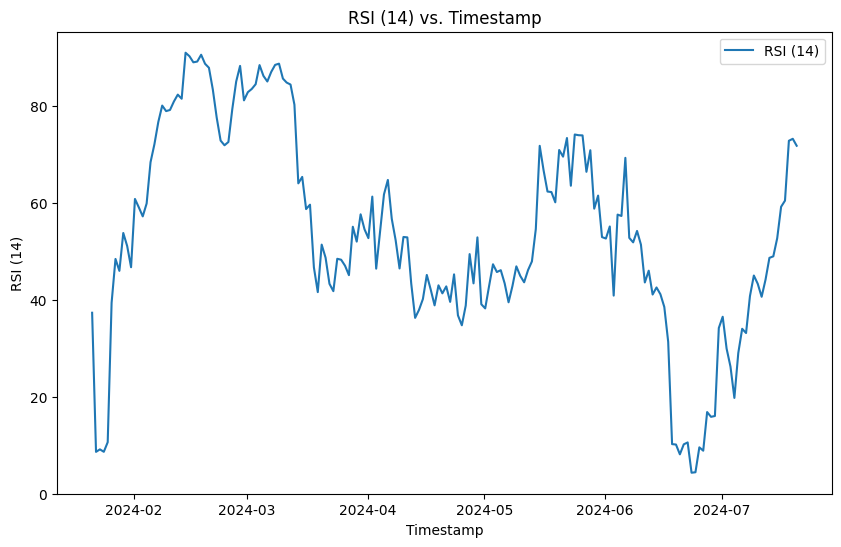

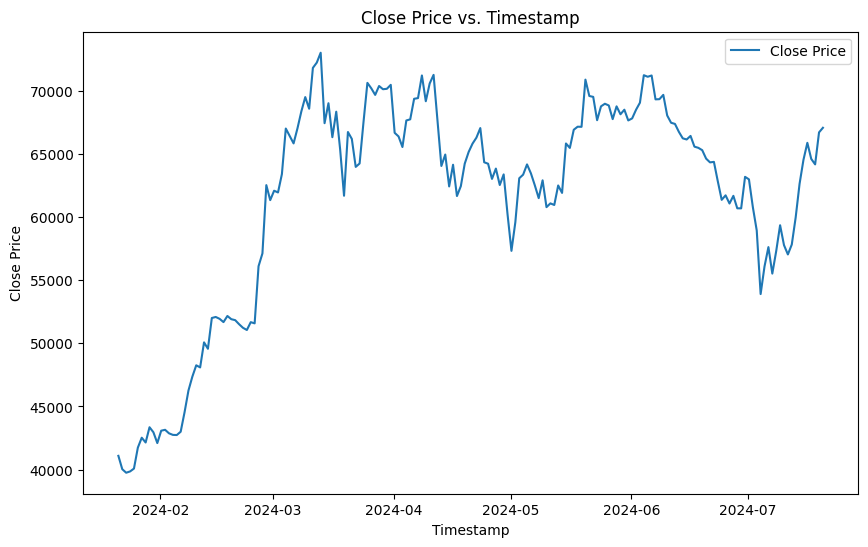

In [7]:
# plot RSI vs. timestamp and plot close vs. timestamp
plt.figure(figsize=(10, 6))
plt.plot(hist_btc['timestamp'], hist_btc['rsi_14'], label='RSI (14)')
plt.title('RSI (14) vs. Timestamp')
plt.xlabel('Timestamp')
plt.ylabel('RSI (14)')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(hist_btc['timestamp'], hist_btc['close'], label='Close Price')
plt.title('Close Price vs. Timestamp')
plt.xlabel('Timestamp')
plt.ylabel('Close Price')
plt.legend()
plt.show()

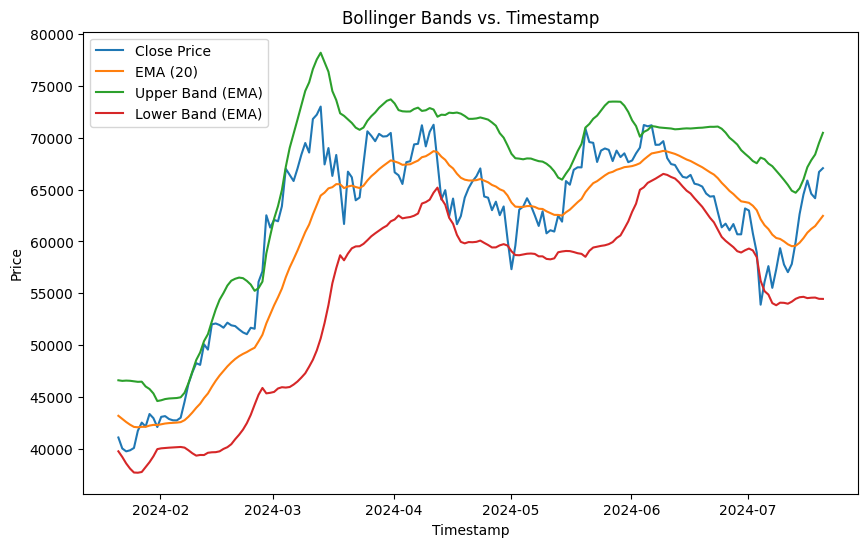

In [9]:
# plot Bollinger Bands vs. timestamp and plot close vs. timestamp on same graph
plt.figure(figsize=(10, 6))
plt.plot(hist_btc['timestamp'], hist_btc['close'], label='Close Price')
plt.plot(hist_btc['timestamp'], hist_btc['bb_ema_20'], label='EMA (20)')
plt.plot(hist_btc['timestamp'], hist_btc['bb_ema_upper_20'], label='Upper Band (EMA)')
plt.plot(hist_btc['timestamp'], hist_btc['bb_ema_lower_20'], label='Lower Band (EMA)')
plt.title('Bollinger Bands vs. Timestamp')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.legend()
plt.show()


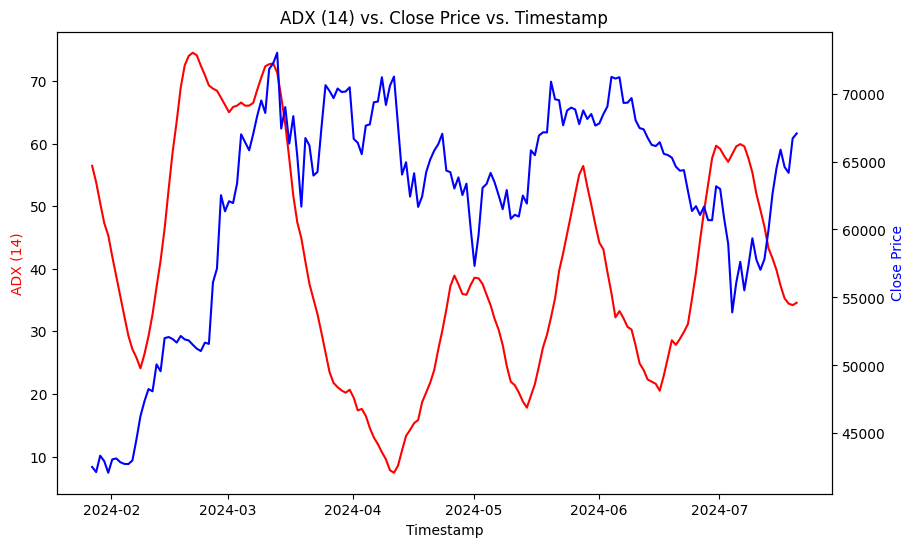

In [15]:
# lets plot the ADX vs. timestamp abd plot close vs. timestamp on same graph with a dual y-axis
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()
ax1.plot(hist_btc['timestamp'], hist_btc['adx'], label='ADX (14)', color='r')
ax2.plot(hist_btc['timestamp'], hist_btc['close'], label='Close Price', color='b')
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('ADX (14)', color='r')
ax2.set_ylabel('Close Price', color='b')
plt.title('ADX (14) vs. Close Price vs. Timestamp')
plt.show()



### **Model Training**

In [8]:
# Features (drop columns we don't need)
X = hist_btc.drop(columns=['symbol', 'timestamp', 'future_close', 'target'])
y = hist_btc['target']

# Assume X and y are already defined
# Split the data into 80% train and 20% test while maintaining the time order
train_size = int(0.8 * len(X))

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Initialize LightGBM model
model = lgb.LGBMClassifier()
# Define hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'num_leaves': [31, 64, 128]
}

# Define time series cross-validation with 5 splits
tscv = TimeSeriesSplit(n_splits=5)

# GridSearchCV with time-series cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=tscv, scoring='accuracy', verbose=2)

# Fit on the training data
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_
print(f"Best hyperparameters: {grid_search.best_params_}")

# Predict on the test set
y_pred_test = best_model.predict(X_test)

# Evaluate the accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Set Accuracy: {test_accuracy}")

# Output the trained model and scaler (optional)
with open('lightgbm_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# with open('scaler.pkl', 'wb') as f:
#     pickle.dump(scaler, f)

# predict on whole dataset
y_pred_whole_hist = best_model.predict(X)
accuracy_whole_hist = accuracy_score(y, y_pred_whole_hist)
print(f"Overall Accuracy: {accuracy_whole_hist}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Info] Number of positive: 12717, number of negative: 12558
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002298 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4631
[LightGBM] [Info] Number of data points in the train set: 25275, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503145 -> initscore=0.012582
[LightGBM] [Info] Start training from score 0.012582
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

### **Backtesting**

In [22]:
# now lets take the y_pred_whole_hist and join it to the hist_btc dataframe so we can backtest a strategy
predictions = pd.DataFrame({'prediction': y_pred_whole_hist}, index=valid_indices)
backtest_data = data.copy()
backtest_data = backtest_data.join(predictions, how='right')
backtest_data.reset_index(inplace=True)
backtest_data.head()

,symbol,timestamp,open,high,low,close,volume,trade_count,vwap,prediction
0,BTC/USD,2024-01-01 00:43:00+00:00,42401.9500,42401.9500,42401.9500,42401.9500,0.000000,0.0,0.000,1
1,BTC/USD,2024-01-01 00:44:00+00:00,42424.5490,42424.5490,42424.5490,42424.5490,0.000000,0.0,0.000,1
2,BTC/USD,2024-01-01 00:47:00+00:00,42436.5885,42436.5885,42436.5885,42436.5885,0.000000,0.0,0.000,1
3,BTC/USD,2024-01-01 00:48:00+00:00,42461.5170,42461.5170,42430.2065,42430.2065,0.000024,1.0,42461.517,1
4,BTC/USD,2024-01-01 00:49:00+00:00,42424.6120,42424.6120,42424.6120,42424.6120,0.000000,0.0,0.000,1


In [26]:

# Initialize backtesting variables
initial_capital = 10000  # Starting capital
capital = initial_capital
capital_allocation_per_trade = 0.05  # 5% of the current capital per trade
position = 0  # No position initially (0 = no position, 1 = long, -1 = short)

# Track metrics
capital_history = [capital]
trade_profit = []  # Track profit/loss for each trade
positions = []  # Store the buy/sell decisions for plotting
buy_signals = []  # Timestamps of buys
sell_signals = []  # Timestamps of sells

# Loop over the data to simulate the strategy
for i in range(1, len(backtest_data)):
    current_price = backtest_data['close'].iloc[i]
    previous_prediction = backtest_data['prediction'].iloc[i-1]
    current_prediction = backtest_data['prediction'].iloc[i]

    # If transitioning from 0 to 1 (buy signal) and not already in a position
    if previous_prediction == 0 and current_prediction == 1 and position != 1:
        # Buy position
        allocation = capital_allocation_per_trade * capital
        shares_bought = allocation / current_price
        position = 1  # Set position to long (buy)
        buy_signals.append(backtest_data['timestamp'].iloc[i])
        positions.append(1)
    # If transitioning from 1 to 0 (sell signal) and currently in a long position
    elif previous_prediction == 1 and current_prediction == 0 and position == 1:
        # Sell position
        sale_value = shares_bought * current_price
        profit = sale_value - allocation
        capital += profit
        trade_profit.append(profit)
        sell_signals.append(backtest_data['timestamp'].iloc[i])
        positions.append(-1)
        position = 0  # Reset position

    # Track capital after each step
    capital_history.append(capital)

# After loop finishes, convert data to Pandas Series for plotting and analysis
capital_history = pd.Series(capital_history, index=backtest_data['timestamp'].iloc[:len(capital_history)])

# Calculate net profit
net_profit = capital - initial_capital
print(f"Net Profit: ${net_profit:.2f}")

# Calculate maximum drawdown
capital_series = pd.Series(capital_history)
cumulative_max = capital_series.cummax()
drawdown = (capital_series - cumulative_max) / cumulative_max
max_drawdown = drawdown.min()
print(f"Max Drawdown: {max_drawdown * 100:.2f}%")

# Sharpe Ratio calculation
daily_returns = capital_series.pct_change().dropna()
sharpe_ratio = np.sqrt(252) * daily_returns.mean() / daily_returns.std()
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

# Sortino Ratio calculation (using only negative returns)
downside_returns = daily_returns[daily_returns < 0]
sortino_ratio = np.sqrt(252) * daily_returns.mean() / downside_returns.std()
print(f"Sortino Ratio: {sortino_ratio:.2f}")

# Annualized Return (CAGR)
time_length_backtest = (backtest_data['timestamp'].iloc[-1] - backtest_data['timestamp'].iloc[0]).days / 365.25
annualized_return = (capital / initial_capital) ** (1 / time_length_backtest) - 1
print(f"Annualized Compound Return (CAGR): {annualized_return:.2%}")

Net Profit: $6103.62
Max Drawdown: -0.60%
Sharpe Ratio: 0.94
Sortino Ratio: 0.44
Annualized Compound Return (CAGR): 128.14%


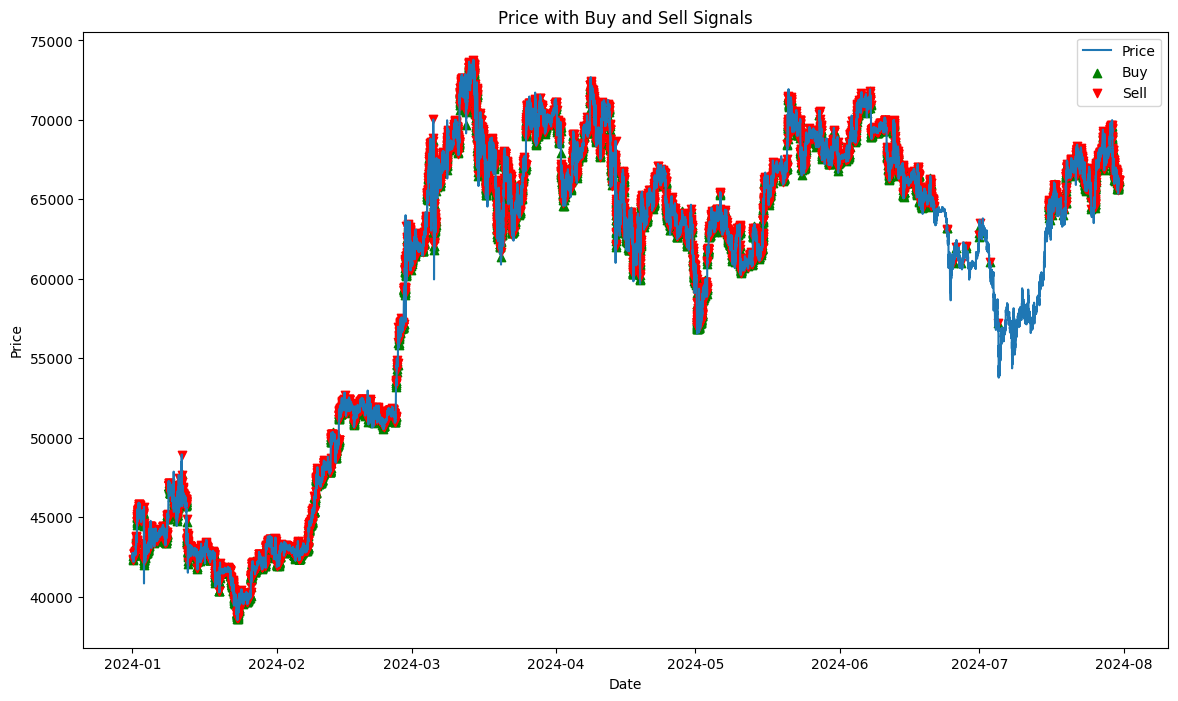

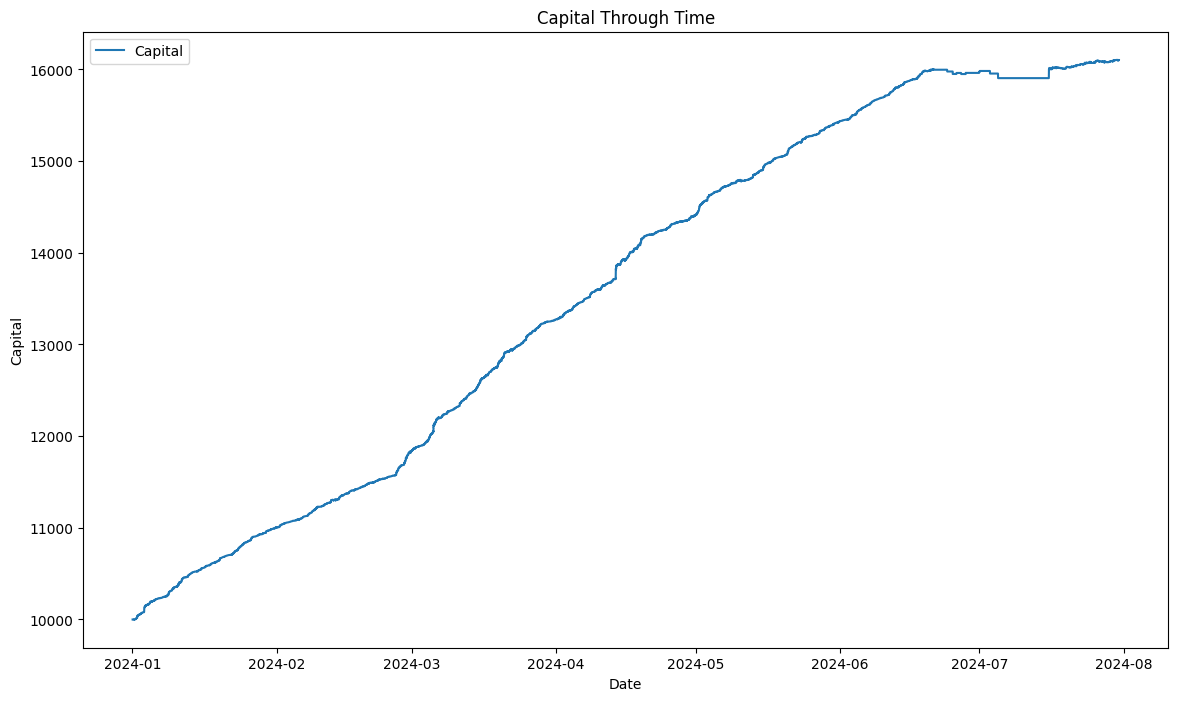

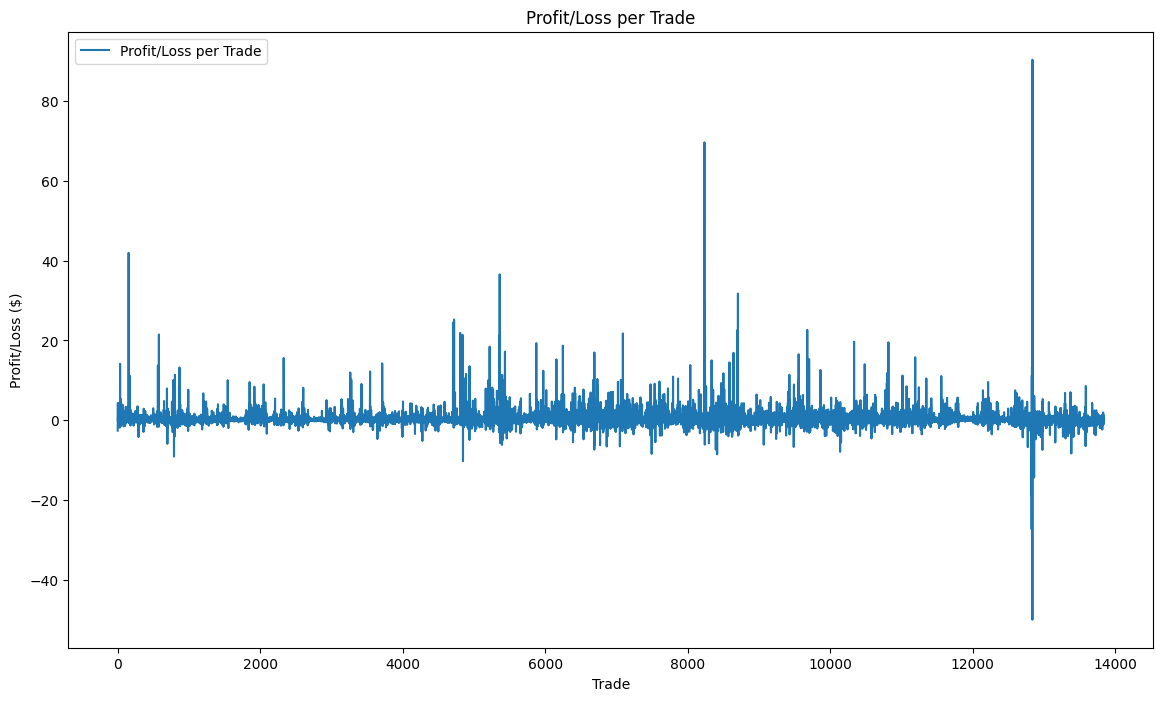

In [24]:
# Plot 1: Price with Buy/Sell Signals
plt.figure(figsize=(14, 8))
plt.plot(backtest_data['timestamp'], backtest_data['close'], label='Price')
plt.scatter(buy_signals, backtest_data.loc[backtest_data['timestamp'].isin(buy_signals), 'close'], marker='^', color='g', label='Buy', alpha=1)
plt.scatter(sell_signals, backtest_data.loc[backtest_data['timestamp'].isin(sell_signals), 'close'], marker='v', color='r', label='Sell', alpha=1)
plt.title('Price with Buy and Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot 2: Capital Through Time
plt.figure(figsize=(14, 8))
plt.plot(capital_history, label='Capital')
plt.title('Capital Through Time')
plt.xlabel('Date')
plt.ylabel('Capital')
plt.legend()
plt.show()

# Plot 3: Profit/Loss Per Trade
plt.figure(figsize=(14, 8))
plt.plot(trade_profit, label='Profit/Loss per Trade')
plt.title('Profit/Loss per Trade')
plt.xlabel('Trade')
plt.ylabel('Profit/Loss ($)')
plt.legend()
plt.show()